___
<h1> Machine Learning </h1>
<h2> Systems Engineering and Computer Technologies / Engenharia de Sistemas e Tecnologias Informáticas
(LESTI)</h2>
<h3> Instituto Superior de Engenharia / Universidade do Algarve </h3>

[LESTI](https://ise.ualg.pt/curso/1941) / [ISE](https://ise.ualg.pt) / [UAlg](https://www.ualg.pt)

Pedro J. S. Cardoso (pcardoso@ualg.pt)

___

## Neural Networks: Digits dataset
Similar to what we have done with the Iris dataset, build a neural network that can be used to predict digits

In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

In [2]:
digits = load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=1)

With default parameters the results are the following

In [3]:
clf = MLPClassifier(random_state=1).fit(X_train, y_train)

clf.score(X_test, y_test)

0.9755555555555555

Not bad! Can it be improved?

In [4]:
clf = MLPClassifier(
    max_iter=1000,
    hidden_layer_sizes=(100, 100),
    random_state=1
).fit(X_train, y_train)

clf.score(X_test, y_test)

0.9866666666666667

It was not worst but there isn't much space to improve. Another try...?

In [5]:
clf = MLPClassifier(
    max_iter=1000,
    tol=1e-10,
    hidden_layer_sizes=(1000),
    random_state=1
).fit(X_train, y_train)

clf.score(X_test, y_test)

/Users/pcardoso/anaconda3/envs/AprendizagemAutomatica/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


0.9844444444444445

And again...!? Since it did not converge, let us increase the maximum iterations number

In [6]:
clf = MLPClassifier(
    max_iter=10000,
    tol=1e-10,
    hidden_layer_sizes=(1000,),
    random_state=1,
    activation='tanh',
).fit(X_train, y_train)

clf.score(X_test, y_test)

0.9911111111111112

Find the missclassifications and plot them

Missclassification 108: 5 != 9


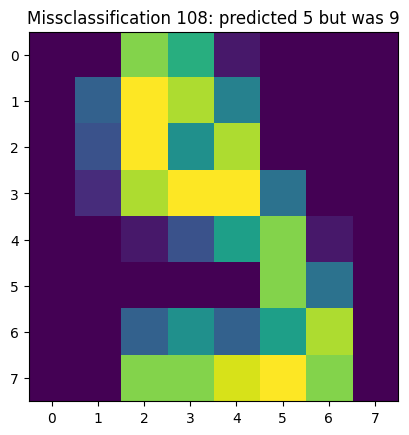

Missclassification 249: 9 != 7


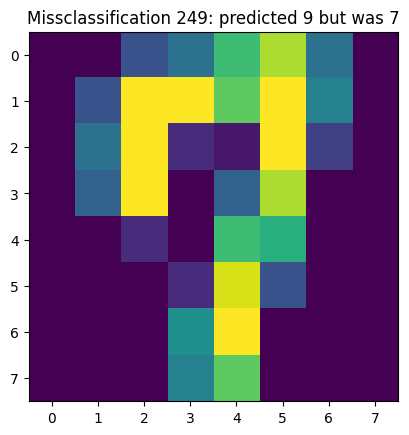

Missclassification 394: 9 != 5


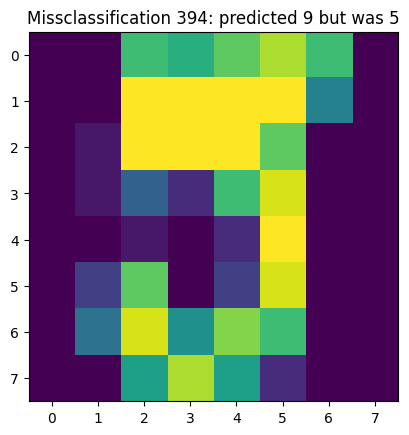

Missclassification 400: 2 != 3


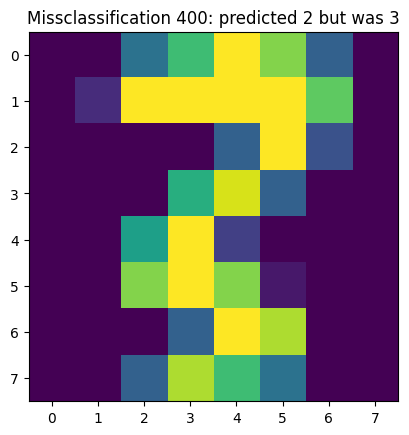

In [14]:
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt

# compute the predictions
pred = clf.predict(X_test)


# find the missclassifications
for i, (y_hat, y) in enumerate(zip(pred, y_test)):
    if y_hat != y:
        print(f"Missclassification {i}: {y_hat} != {y}")
        digit = X_test[i]
        
        # plot the missclassifications with imageshow
        imshow(digit.reshape((8,8)))
        plt.title(f"Missclassification {i}: predicted {y_hat} but was {y}")
        plt.show()


In [ ]:
from mat